# Fund 29. 사이킷런을 활용한 추천 시스템 입문
- 추천 시스템 : 사용자에게 관련된 아이템을 추천해주는 것
- 범주형 데이터를 다룬다. -> 범주형, 이산적인 데이터를 숫자 데이터로 변환한다. 
- 이 숫자 벡터의 유사도를 계산해 유사도가 가까운 제품을 추천해준다.

## 1. 코사인 유사도
- 유사도를 계산하는 방법 중 가장 잘 알려진 방법이다. 
- 두 벡터 간의 코사인 값을 이용해 두 벡터의 유사도를 계산한다.  
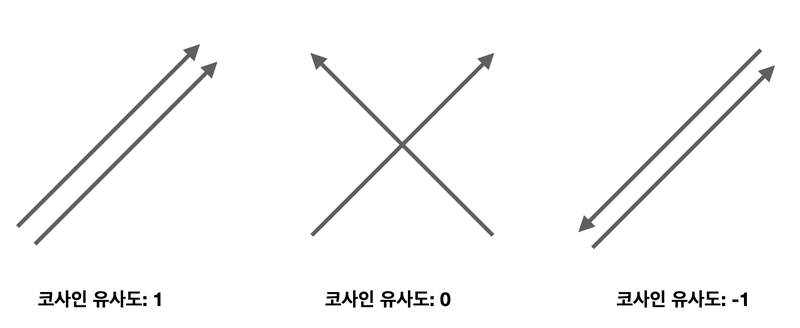  
https://lms.aiffel.io/steps2/3950

### Numpy 활용

In [1]:
import numpy as np

t1 = np.array([1, 1, 1])
t2 = np.array([2, 0, 1])

In [2]:
from numpy import dot
from numpy.linalg import norm
def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

In [3]:
cos_sim(t1, t2)

0.7745966692414834

### 사이킷런 활용
- 위 방법을 좀 더 간편하게 구할 수 있다. 주의할 점은 이 모듈은 입력값으로 2차원 배열을 받기 때문에, 2차원 배열로 정의해야 한다. 

In [4]:
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
# 해당 모듈은 입력값으로 2차원 배열을 받기 때문에, 2차원 배열로 정의한다.
t1 = np.array([[1, 1, 1]])
t2 = np.array([[2, 0, 1]])
cosine_similarity(t1, t2)

array([[0.77459667]])

- 코사인 유사도 외에도 유클리드 거리, 자카드 유사도, 피어슨 상관계수 등의 다른 방법으로 유사도를 계산할 수 있다. 

## 2. 추천 시스템의 종류
- 가장 기본적으로 알려진 추천의 방식으로는 협업 필터링 방식과 콘텐츠 기반 필터링 방식이 있다.
- 협업 필터링 방식은 다시 사용자 기반과 아이템 기반, 그리고 잠재요인 협업 필터링 방식으로 나뉜다. 

## 3. 콘텐츠 기반 필터링
- 콘텐츠 기반은 순수하게 콘텐츠의 내용만을 비교해서 추천하는 방식이다. 
- 영화의 예를 들면 장르, 배우, 감독 등의 정보가 영화의 특성(feature)이 되어, 이 특성이 콘텐츠가 비슷하다고 말할 수 있는 요인이 된다. 

In [6]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [7]:
#wget https://aiffelstaticprd.blob.core.windows.net/media/documents/movie_dataset.csv
#mv movie_dataset.csv  ~/aiffel/movie_recommendation

In [8]:
import os
csv_path = os.getenv('HOME')+'/aiffel/movie_recommendation/movie_dataset.csv'
df = pd.read_csv(csv_path)
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [9]:
# 특성 선택
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [10]:
# 컬럼이 꽤 많지만, 여기서는 아래의 특성만 고려해 영화의 유사도를 계산해보자. 
features = ['keywords','cast','genres','director']
features

['keywords', 'cast', 'genres', 'director']

In [11]:
def combine_features(row):
    return row['keywords']+" "+row['cast']+" "+row['genres']+" "+row['director']

combine_features(df[:5])

0    culture clash future space war space colony so...
1    ocean drug abuse exotic island east india trad...
2    spy based on novel secret agent sequel mi6 Dan...
3    dc comics crime fighter terrorist secret ident...
4    based on novel mars medallion space travel pri...
dtype: object

In [12]:
for feature in features:
    df[feature] = df[feature].fillna('')

df["combined_features"] = df.apply(combine_features,axis=1)
df["combined_features"]

0       culture clash future space war space colony so...
1       ocean drug abuse exotic island east india trad...
2       spy based on novel secret agent sequel mi6 Dan...
3       dc comics crime fighter terrorist secret ident...
4       based on novel mars medallion space travel pri...
                              ...                        
4798    united states\u2013mexico barrier legs arms pa...
4799     Edward Burns Kerry Bish\u00e9 Marsha Dietlein...
4800    date love at first sight narration investigati...
4801     Daniel Henney Eliza Coupe Bill Paxton Alan Ru...
4802    obsession camcorder crush dream girl Drew Barr...
Name: combined_features, Length: 4803, dtype: object

- 이제 이 컬럼을 벡터화하고, 코사인 유사도를 계산해보자. 
- 장르, 배우명, 감독명의 텍스트 데이터를 범주형 데이터로 보기 때문에 단순하게 등장횟수를 세어 숫자 벡터를 만들자. 
- 사이킷런의 `CountVectorizer()`을 사용하면 편리하다. 

In [13]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(df["combined_features"])
print(type(count_matrix))
print(count_matrix.shape)
print(count_matrix)

<class 'scipy.sparse.csr.csr_matrix'>
(4803, 14845)
  (0, 3115)	1
  (0, 2616)	1
  (0, 4886)	1
  (0, 12386)	2
  (0, 14235)	1
  (0, 2755)	1
  (0, 12299)	1
  (0, 11517)	1
  (0, 14561)	1
  (0, 14820)	1
  (0, 11490)	1
  (0, 12134)	1
  (0, 14291)	1
  (0, 12567)	1
  (0, 7496)	1
  (0, 8831)	1
  (0, 11217)	1
  (0, 86)	1
  (0, 144)	1
  (0, 4435)	1
  (0, 11745)	1
  (0, 4566)	1
  (0, 6542)	1
  (0, 2061)	1
  (1, 86)	1
  :	:
  (4801, 10069)	1
  (4801, 5844)	1
  (4801, 252)	1
  (4801, 4098)	1
  (4801, 14796)	1
  (4801, 11361)	1
  (4801, 2978)	1
  (4801, 12036)	1
  (4801, 6138)	1
  (4802, 9659)	1
  (4802, 3812)	1
  (4802, 1788)	2
  (4802, 4210)	1
  (4802, 5181)	1
  (4802, 2912)	1
  (4802, 3821)	1
  (4802, 1069)	1
  (4802, 11185)	1
  (4802, 3681)	1
  (4802, 5399)	1
  (4802, 3894)	1
  (4802, 2056)	1
  (4802, 3093)	1
  (4802, 4502)	1
  (4802, 5900)	2


- `count_matrix`의 type은 `CSR(Compressed Sparse Row) Matrix`였다. 이는 Sparse한 matrix에서 0이 아닌 유효한 데이터로 채워지는 데이터의 값과 좌표 정보만으로 구성해 메모리 사용량을 최소화하면서도 Sparse한 matrix와 동일한 행렬을 표현할 수 있도록 하는 데이터 구조다. 
- 이제 4803개의 영화들이 모두 Vectorized되었고, 이들의 코사인 유사도를 표현하는 4803X4803의 `cosine_similarity` matrix를 구해보자.

In [14]:
cosine_sim = cosine_similarity(count_matrix)
print(cosine_sim)
print(cosine_sim.shape)

[[1.         0.10540926 0.12038585 ... 0.         0.         0.        ]
 [0.10540926 1.         0.0761387  ... 0.03651484 0.         0.        ]
 [0.12038585 0.0761387  1.         ... 0.         0.11145564 0.        ]
 ...
 [0.         0.03651484 0.         ... 1.         0.         0.04264014]
 [0.         0.         0.11145564 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.04264014 0.         1.        ]]
(4803, 4803)


In [15]:
# 코사인 유사도로 계산된 가장 비슷한 영화 3편을 선별해 추천해보자.
def get_title_from_index(index):
    return df[df.index == index]["title"].values[0]
def get_index_from_title(title):
    return df[df.title == title]["index"].values[0]

movie_user_likes = "Avatar"
movie_index = get_index_from_title(movie_user_likes)
similar_movies = list(enumerate(cosine_sim[movie_index]))

sorted_similar_movies = sorted(similar_movies, key=lambda x:x[1], reverse=True)[1:]

i = 0
print(movie_user_likes + "와 비슷한 영화 3편은 " + "\n")
for item in sorted_similar_movies:
    print(get_title_from_index(item[0]))
    i += 1
    if i == 3:
        break;

Avatar와 비슷한 영화 3편은 

Guardians of the Galaxy
Aliens
Star Wars: Clone Wars: Volume 1


## 4. 협업 필터링 (1) 협업 필터링의 종류
- 협업 필터링(Collaborative Filtering)은 과거의 사용자 행동 양식(User Behavior) 데이터를 기반으로 추천하는 방식이다. 
- 여기서 다루는 학습용 데이터 자체에서 사용자 행동양식을 나타내기 어렵지만, 잠재요인 기법을 활용하면 행동양식을 어느 정도 데이터로 나타낼 수 있다. 
- 사용자 기반과 아이템 기반은 유사도를 계산하는 방식이고 잠재요인은 행렬 인수분해(matrix factorization)을 이용해 잠재요인을 분석한다.  

### 사용자 기반 
- 최근접 이웃 협업 필터링은 다시 사용자 기반과 아이템 기반으로 나뉜다. 이 방식은 동일한 제품에 대해 평점을 매긴 데이터를 분석해 추천하는 방식이다. 
- 사용자 기반 협업 필터링은 "당신과 비슷한 고객들이 다음 상품을 구매했습니다"라는 문구로 요약할 수 있다.  

### 아이템 기반
- 아이템 기반은 아이템 간의 유사도를 측정해 해당 아이템을 추천하는 방식이다. 
- 일반적으로 사용자 기반보다는 아이템 기반 방식이 정확도가 더 높다고 한다. 
- 아이템 기반 협업 필터링은 "이 상품을 선택한 다른 고객들은 다음 상품을 구매했습니다"라는 문구로 요약할 수 있다. 

## 5. 협업 필터링 (2) 행렬 인수분해
- 잠재요인 협업 필터링은 평점행렬의 행렬 인수분해를 통해 잠재요인(latent factor)을 분석한다. 
- 행렬 인수분해에는 SVD, ALS, NMF과 같은 기법들이 있다. 
- 행렬 인수분해는 인수분해와 비슷한데, 행렬도 곱으로 분해할 수 있고, 분해 행렬을 사용하면 원하는 답을 더 쉽게 찾을 수 있다. (추천 알고리즘에서 파라미터 수가 줄어든다!)  

### SVD
- 많이 사용되는 행렬 인수분해 방식으로, SVD(Singular Vector Decomposition)은 우리나라 말로 특이값 분해다. 
- MXN 형태의 행렬 A를 다음과 같은 형태로 분해해서 나타내는 것이다.  
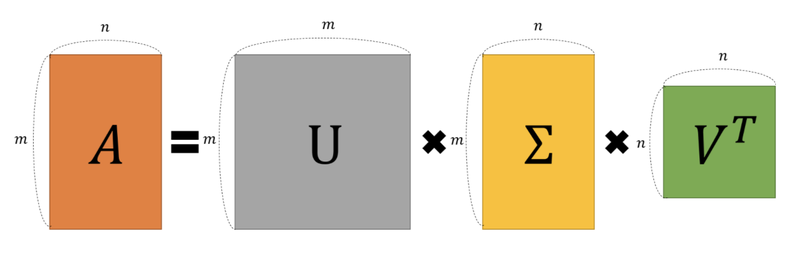  
https://lms.aiffel.io/steps2/3950

- SVD는 "정보 복원"을 위해 사용된다.  
> 특이값 분해는 분해되는 과정보다는 분해된 행렬을 다시 조합하는 과정에서 그 응용력이 빛을 발한다. 기존의 U,Σ,VTU,Σ,VT로 분해되어 있던 AA행렬을 특이값 p개만을 이용해 A’라는 행렬로 ‘부분 복원’ 시킨 할 수 있다. 특이값의 크기에 따라 A의 정보량이 결정되기 때문에 값이 큰 몇 개의 특이값들을 가지고도 충분히 유용한 정보를 유지할 수 있다. 최대한 중요한 정보들만 부분 복원해서 사용하면 사진의 용량은 줄어들지만 여전히 사진이 보여주려는 내용은 살릴 수 있다.  


### SVD 실습
- `numpy.linalg`의 `svd` 모듈을 import해 4X4 형태의 행렬 A를 SVD해보자. 

In [16]:
import numpy as np
from numpy.linalg import svd

np.random.seed(30)
A = np.random.randint(0, 100, size=(4, 4))
A

array([[37, 37, 45, 45],
       [12, 23,  2, 53],
       [17, 46,  3, 41],
       [ 7, 65, 49, 45]])

In [17]:
svd(A)

(array([[-0.54937068, -0.2803037 , -0.76767503, -0.1740596 ],
        [-0.3581157 ,  0.69569442, -0.13554741,  0.60777407],
        [-0.41727183,  0.47142296,  0.28991733, -0.72082768],
        [-0.6291496 , -0.46389601,  0.55520257,  0.28411509]]),
 array([142.88131188,  39.87683209,  28.97701433,  14.97002405]),
 array([[-0.25280963, -0.62046326, -0.4025583 , -0.6237463 ],
        [ 0.06881225, -0.07117038, -0.8159854 ,  0.56953268],
        [-0.73215039,  0.61782756, -0.23266002, -0.16767299],
        [-0.62873522, -0.47775436,  0.34348792,  0.50838848]]))

In [18]:
U, Sigma, VT = svd(A)

print('U matrix: {}\n'.format(U.shape),U)
print('Sigma: {}\n'.format(Sigma.shape),Sigma)
print('V Transpose matrix: {}\n'.format(VT.shape),VT)

U matrix: (4, 4)
 [[-0.54937068 -0.2803037  -0.76767503 -0.1740596 ]
 [-0.3581157   0.69569442 -0.13554741  0.60777407]
 [-0.41727183  0.47142296  0.28991733 -0.72082768]
 [-0.6291496  -0.46389601  0.55520257  0.28411509]]
Sigma: (4,)
 [142.88131188  39.87683209  28.97701433  14.97002405]
V Transpose matrix: (4, 4)
 [[-0.25280963 -0.62046326 -0.4025583  -0.6237463 ]
 [ 0.06881225 -0.07117038 -0.8159854   0.56953268]
 [-0.73215039  0.61782756 -0.23266002 -0.16767299]
 [-0.62873522 -0.47775436  0.34348792  0.50838848]]


- 잘 분해되었다. 이제 다시 복원해보자. 복원을 위해서는 위 행렬들을 내적한다. 한 가지 유의할 사항은 Sigma는 1차원이기 때문에 0을 포함한 대각 행렬로 변환 후 내적한다. 

In [19]:
Sigma_mat = np.diag(Sigma)

A_ = np.dot(np.dot(U, Sigma_mat), VT)
A_

array([[37., 37., 45., 45.],
       [12., 23.,  2., 53.],
       [17., 46.,  3., 41.],
       [ 7., 65., 49., 45.]])

### Truncated SVD
- 추천 시스테메서의 행렬 인수분해는 SVD 중에서도 Truncated SVD를 사용한다. 
- 이는 잘린 SVD를 말하며, 다른 말로 LSA(Latent semantic analysis), 잠재 의미 분석이라고 번역할 수 있다. 
- Truncated SVD를 이용해 분해한 뒤 복원하면 SVD처럼 완벽히 같은 행렬이 나오지는 않는다. (차원을 축소한 다음 행렬을 분해하기 때문이다)

## 6. 협업 필터링 (3) 행렬 인수분해와 잠재요인 협업 필터링
- SVD를 평점행렬에 적용해 잠재요인을 분석하는 것을 도식화하면 아래와 같다.  
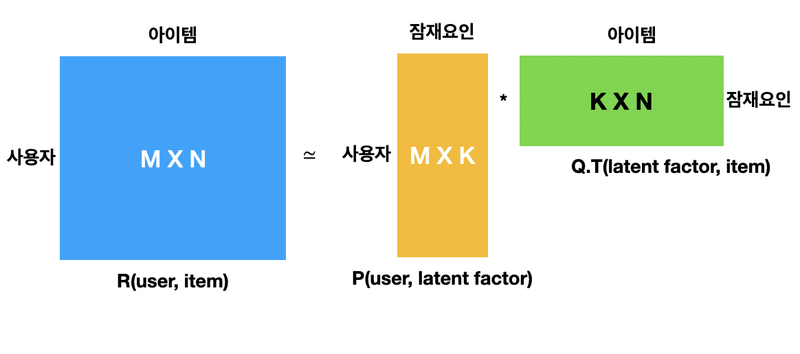  
https://lms.aiffel.io/steps2/3950  

- R : 사용자와 아이템 사이의 행렬
- P : 사용자와 잠재요인 사이의 행렬
- Q : 아이템과 잠재요인 사이의 행렬 -> 전치 행렬 형태로 나타냄  

- 사용자가 아이템에 대한 평점을 매기는 요인으로 많은 항목들이 있을 것이다. 이는 지극히 주관적이라 알 수가 없다. 
- 따라서 사용자가 평점을 매기는 요인을 "잠재요인"으로 취급한 뒤 SVD 기법을 이용해 분해한 뒤 다시 합치는 방법으로 영화에 평점을 매긴 이유를 벡터화해 이를 기반으로 추천한다. 이 기법은 넷플릭스나 왓챠, 유튜브 같은 대기업에서 사용해 그 효과를 입증해냈다. 

## 7. 실제 추천 시스템
- 유튜브나 넷플릭스와 같은 대형 기업에서는 추천에 더 많은 것들을 고려한다. 
- 사용자의 구매 여부와 평점 데이터뿐만 아니라 얼마나 오래 시청했는지, 어디로부터 유입되었는지, 시청한 뒤 구매까지의 시간 등의 족적들을 다 분석한다. 이를 전문 용어로 Digital Footpring(디지털 발자국), Digital Shadow(디지털 그림자)라고 한다. 
- 이 중에서 가장 중요한 지표가 클릭률이다. 전문 용어로 CTR(Click Through Rate)이라고 한다. 
- 이러한 데이터들을 모아 추천한 뒤, 해당 아이템이 적절한 추천인지 여부를 평가하는 것 역시 중요하다. 